In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [26]:
df = pd.read_csv('cleaned_heart.csv')

In [27]:
print("Data loaded. Shape:", df.shape)
df.head()


Data loaded. Shape: (4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [28]:
#Handle Missing Values (final check)
print(df.isna().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [30]:
numerical_features = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df[numerical_features].skew().sort_values(ascending=False)

glucose      6.542928
sysBP        1.145285
BMI          0.985646
totChol      0.879159
diaBP        0.713250
heartRate    0.644498
age          0.228867
dtype: float64

In [31]:
from sklearn.preprocessing import StandardScaler
# Apply log1p transformation to highly skewed features
highly_skewed = ['sysBP', 'glucose']
for feature in highly_skewed:
    df[feature] = np.log1p(df[feature])

# Standard scaling for all numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the first few rows
df[numerical_features].head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.234283,-0.940086,-1.326982,-1.083027,0.287693,0.342792,-0.179487
1,-0.417664,0.300797,-0.488215,-0.159355,0.720094,1.590451,-0.246230
2,-0.184345,0.187990,-0.156346,-0.243325,-0.112769,-0.073094,-0.665854
3,1.332233,-0.263241,0.875238,1.016227,0.683242,-0.904866,1.308555
4,-0.417664,1.090450,-0.033155,0.092555,-0.663098,0.758678,0.325550


In [32]:
# Blood pressure difference
df['bp_diff'] = df['sysBP'] - df['diaBP']

# Age groups
df['age_group'] = pd.cut(df['age'], bins=[-3, -1, 0, 1, 3], labels=['young','adult','mid','senior'])

# BMI categories
df['BMI_category'] = pd.cut(df['BMI'], bins=[-3, -1, 0, 1, 3], labels=['underweight','normal','overweight','obese'])

# Interaction terms
df['age_sysBP'] = df['age'] * df['sysBP']
df['BMI_glucose'] = df['BMI'] * df['glucose']

# Optional: check the new features
df[['bp_diff', 'age_group', 'BMI_category', 'age_sysBP', 'BMI_glucose']].head()


,bp_diff,age_group,BMI_category,age_sysBP,BMI_glucose
0,-0.243955,young,overweight,1.637871,-0.051637
1,-0.328860,adult,overweight,0.203910,-0.177309
2,0.086979,adult,normal,0.028822,0.075088
3,-0.140990,senior,overweight,1.166021,0.894059
4,-0.125711,adult,normal,0.013848,-0.215872


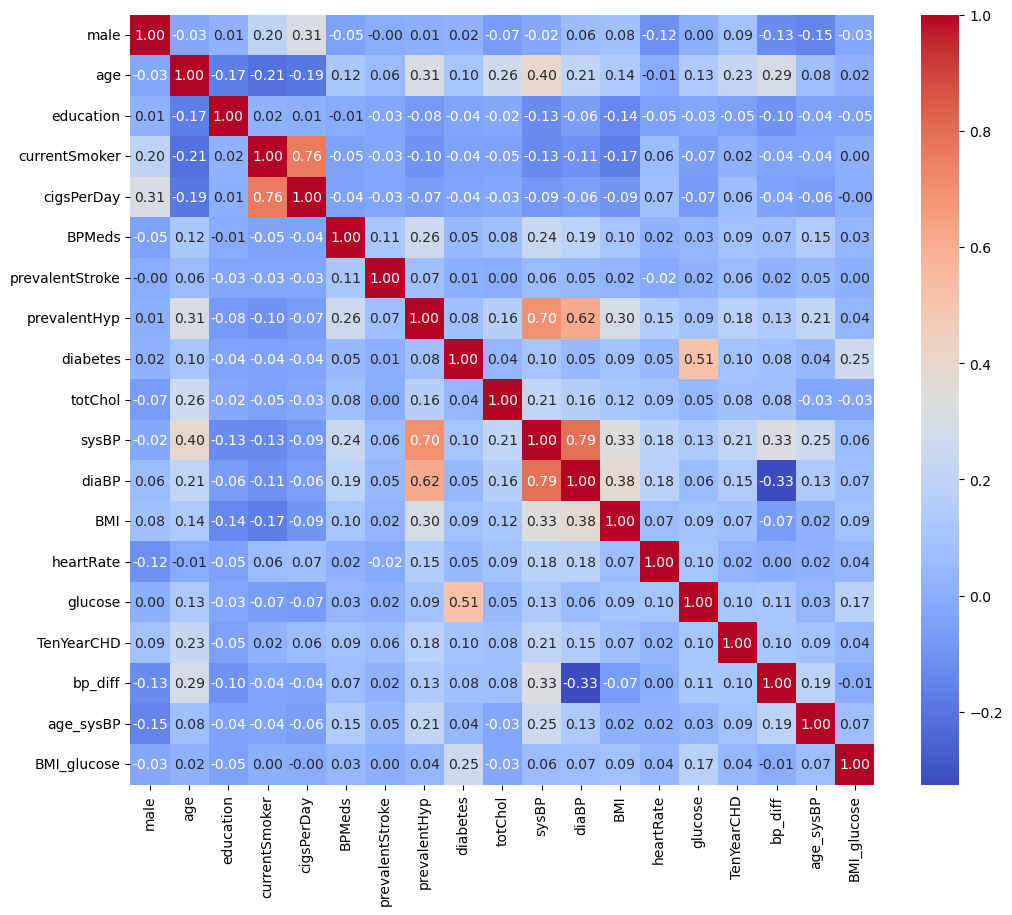

In [36]:
# Correlation matrix
corr_matrix = df.corr()

# Visualize correlations
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [38]:
# Compute correlation of all features with target
target_corr = df.corr()['TenYearCHD'].sort_values(ascending=False)
print("Correlation with TenYearCHD:\n", target_corr)


Correlation with TenYearCHD:
 TenYearCHD         1.000000
age                0.225408
sysBP              0.210409
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.103743
bp_diff            0.100456
diabetes           0.097344
age_sysBP          0.088433
male               0.088374
BPMeds             0.086448
totChol            0.081749
BMI                0.074326
prevalentStroke    0.061823
cigsPerDay         0.058729
BMI_glucose        0.039755
heartRate          0.022851
currentSmoker      0.019448
education         -0.053002
Name: TenYearCHD, dtype: float64


In [40]:
# Correlation matrix for all features
corr_matrix = df.corr().abs()  # absolute value for easier comparison

# Select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features (to consider removing):", high_corr_features)


Highly correlated features (to consider removing): []


In [41]:
# Save the cleaned and feature-engineered dataset
df.to_csv('framingham_feature_engineered.csv', index=False)
